In [2]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/lyowfyloepbidjftxgp3uvpmf6t5c5')
# df.to_excel("week2.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26829 entries, 0 to 26828
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Code        26829 non-null  object 
 1   Country Name        26829 non-null  object 
 2   Gender              26829 non-null  object 
 3   Date                26829 non-null  object 
 4   Unemployement Rate  26829 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


In [4]:
df['Country Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czechia', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France', 'United Kingdom', 'Greece', 'Hungary',
       'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan', 'Korea',
       'Lithuania', 'Luxembourg', 'Latvia', 'Mexico', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Sweden',
       'Turkey', 'United States of America'], dtype=object)

In [4]:
# According to source we have to drop :
# Colombia Costa Rica Iceland Israel Turkey

In [5]:
cleanDf = df.loc[~df['Country Name'].isin(['Colombia','Costa Rica','Iceland','Israel','Turkey'])]

In [6]:
cleanDf.to_excel("week2.xlsx",index=False)

## time series forecasting using xgboost for USA

In [21]:
usData = cleanDf.loc[(cleanDf['Country Name'] == 'United States of America') & (cleanDf['Gender'] == 'ALL')].reset_index()

In [42]:
usData.head(20)

,Date,Unemployement Rate,Year,Quarter,Month
0,2000-01-01,4.0,2000,1,1
1,2000-02-01,4.1,2000,1,2
2,2000-03-01,4.0,2000,1,3
3,2000-04-01,3.8,2000,2,4
4,2000-05-01,4.0,2000,2,5
5,2000-06-01,4.0,2000,2,6
6,2000-07-01,4.0,2000,3,7
7,2000-08-01,4.1,2000,3,8
8,2000-09-01,3.9,2000,3,9
9,2000-10-01,3.9,2000,4,10


In [26]:
usData.columns

Index(['index', 'Country Code', 'Country Name', 'Gender', 'Date',
       'Unemployement Rate'],
      dtype='object')

In [29]:
usData = usData.drop(["Country Code",'Country Name','Gender','index'],axis=1)

In [37]:
usData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                261 non-null    datetime64[ns]
 1   Unemployement Rate  261 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [36]:
usData['Date'] = pd.to_datetime(usData['Date'])

In [40]:
usData['Year'] = usData['Date'].dt.year
usData['Quarter'] = usData['Date'].dt.quarter
usData['Month'] = usData['Date'].dt.month

In [43]:
usData.head(20)

,Date,Unemployement Rate,Year,Quarter,Month
0,2000-01-01,4.0,2000,1,1
1,2000-02-01,4.1,2000,1,2
2,2000-03-01,4.0,2000,1,3
3,2000-04-01,3.8,2000,2,4
4,2000-05-01,4.0,2000,2,5
5,2000-06-01,4.0,2000,2,6
6,2000-07-01,4.0,2000,3,7
7,2000-08-01,4.1,2000,3,8
8,2000-09-01,3.9,2000,3,9
9,2000-10-01,3.9,2000,4,10


In [46]:
splitDate = '2019-01-01'
trainData = usData[usData['Date'] < splitDate]
testData = usData[usData['Date'] >= splitDate]

In [50]:
x_train, y_train = trainData.drop('Unemployement Rate',axis=1), trainData['Unemployement Rate']
x_test, y_test = testData.drop('Unemployement Rate',axis=1), testData['Unemployement Rate']

In [64]:
x_train

,Date,Year,Quarter,Month
0,2000-01-01,2000,1,1
1,2000-02-01,2000,1,2
2,2000-03-01,2000,1,3
3,2000-04-01,2000,2,4
4,2000-05-01,2000,2,5
...,...,...,...,...
223,2018-08-01,2018,3,8
224,2018-09-01,2018,3,9
225,2018-10-01,2018,4,10
226,2018-11-01,2018,4,11


In [61]:
import xgboost
from xgboost import plot_importance, plot_tree

In [56]:
model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)

In [63]:
x_train._get_numeric_data()

,Year,Quarter,Month
0,2000,1,1
1,2000,1,2
2,2000,1,3
3,2000,2,4
4,2000,2,5
...,...,...,...
223,2018,3,8
224,2018,3,9
225,2018,4,10
226,2018,4,11


In [65]:
model.fit(x_train._get_numeric_data(),y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

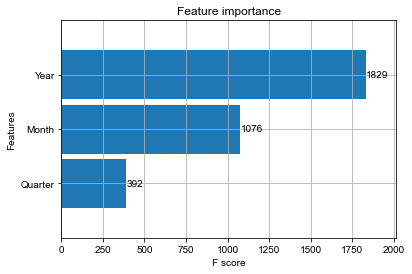

In [66]:
plot_importance(model, height=0.9)

In [78]:
x_test.shape

(33, 4)

In [77]:
yhat = model.predict(x_test._get_numeric_data())
yhat.shape

(33,)

In [76]:
y_test.to_numpy().shape

(33,)

In [74]:
import matplotlib.pyplot as plt

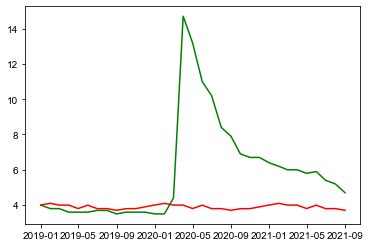

In [82]:
plt.plot(x_test['Date'],yhat,color='red')
plt.plot(x_test['Date'],y_test,color='green')

Based on previous data our model predicted future unemployement rates
However, we did not take into account a black swan event - COVID LOCKDOWN!!!